In [3]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4274f46f-5ac6-40d4-9771-868b9d46c078',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-09-01T00:24:21.043Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9294}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10438, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)

dict

In [5]:
# organize data into a readable format

import pandas as pd
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.json_normalize(data['data'])

# add timestamp 

df['timestamp'] = pd.to_datetime('now')

/Users/danielduque/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [6]:
# create function to automate data pull

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4274f46f-5ac6-40d4-9771-868b9d46c078',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


# use df2 to append data into main df 

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
# write df into a CSV file 

    from pathlib import Path

    output_file = r'/Users/danielduque/Coin_Market_Cap/API.csv'
    output_file_path = Path(r'/Users/danielduque/Coin_Market_Cap/API.csv')

    output_file_path.parent.mkdir(parents=True, exist_ok=True)

    df.to_csv(r'/Users/danielduque/Coin_Market_Cap/API.csv')
    
    if not os.path.isfile(r'/Users/danielduque/Coin_Market_Cap/API.csv'):
        df.to_csv(r'/Users/danielduque/Coin_Market_Cap/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/danielduque/Coin_Market_Cap/API.csv', mode='a', header=False)

In [4]:
# use a for loop to run automated data pull every 60 seconds 

import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

{'status': {'timestamp': '2023-08-22T00:42:01.681Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 9499}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

/Users/danielduque/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/gf/0kz113t924b4z6g7cwk301y40000gn/T/ipykernel_1093/2013401440.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10438,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.947282e+07,1.947282e+07,False,NaN,1,NaN,NaN,None,2023-09-01T00:23:00.000Z,26008.976232,2.032039e+10,25.5574,0.077743,-4.580244,-0.456698,-12.486225,-15.152773,-4.472293,5.064682e+11,48.2646,5.461885e+11,None,2023-09-01T00:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-01 00:24:24.667200
1,1027,Ethereum,ETH,ethereum,7309,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202157e+08,1.202157e+08,True,NaN,2,NaN,NaN,None,2023-09-01T00:23:00.000Z,1650.743047,6.637186e+09,33.2525,0.259726,-3.043634,-0.455815,-11.757998,-14.827630,-13.515863,1.984452e+11,18.9195,1.984452e+11,None,2023-09-01T00:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-01 00:24:24.667200
2,825,Tether USDt,USDT,tether,61094,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.286502e+10,8.543926e+10,True,NaN,3,NaN,NaN,None,2023-09-01T00:22:00.000Z,1.000198,2.739846e+10,21.5369,0.040952,0.017021,0.054968,0.067514,-0.001764,-0.028225,8.288143e+10,7.9018,8.545617e+10,None,2023-09-01T00:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-01 00:24:24.667200
3,1839,BNB,BNB,bnb,1596,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538504e+08,1.538504e+08,False,NaN,4,NaN,NaN,None,2023-09-01T00:23:00.000Z,217.730162,4.371533e+08,23.3277,0.535957,-2.423646,-0.568878,-12.245969,-11.772342,-29.144882,3.349787e+10,3.1936,3.349787e+10,None,2023-09-01T00:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-01 00:24:24.667200
4,52,XRP,XRP,xrp,1059,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.297770e+10,9.998846e+10,False,NaN,5,NaN,NaN,None,2023-09-01T00:23:00.000Z,0.511123,1.069727e+09,10.7927,-0.030664,-2.861387,-1.123620,-27.537425,5.430412,-2.420001,2.707811e+10,2.5816,5.111228e+10,None,2023-09-01T00:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-01 00:24:24.667200
5,3408,USD Coin,USDC,usd-coin,13894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.620293e+10,2.620293e+10,False,NaN,6,NaN,NaN,None,2023-09-01T00:22:00.000Z,1.000367,4.226187e+09,15.9297,0.031583,0.028186,0.025771,0.040677,0.001267,0.025850,2.621254e+10,2.4991,2.621254e+10,None,2023-09-01T00:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-01 00:24:24.667200
6,74,Dogecoin,DOGE,dogecoin,774,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.408217e+11,1.408217e+11,True,NaN,7,NaN,NaN,None,2023-09-01T00:23:00.000Z,0.064058,3.364389e+08,30.3695,0.543555,-2.426064,1.792527,-17.843912,-5.762915,-11.743259,9.020692e+09,0.8601,9.020692e+09,None,2023-09-01T00:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-01 00:24:24.667200
7,2010,Cardano,ADA,cardano,921,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.507229e+10,3.612263e+10,False,NaN,8,NaN,NaN,None,2023-09-01T00:22:00.000Z,0.257131,2.079809e+08,-3.9994,0.877334,-3.035379,-3.064840,-17.284505,-12.278275,-31.878270,9.018184e+09,0.8598,1.157091e+10,None,2023-09-01T00:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-01 00:24:24.667200
8,5426,Solana,SOL,solana,500,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings

In [6]:
# Clean numerical data so that it shows the full number instead of scientific notation 

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
# Call saved df

df1 = pd.read_csv(r'/Users/danielduque/Coin_Market_Cap/API.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.946434e+07,1.946434e+07,False,NaN,1,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,26117.387531,1.336660e+10,47.5998,-0.022911,-0.054559,-11.174078,-12.275341,-12.974891,-3.894406,5.083576e+11,48.2709,5.484651e+11,NaN,2023-08-22T00:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-22 00:42:01.140433
1,1,1027,Ethereum,ETH,ethereum,7240,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202152e+08,1.202152e+08,True,NaN,2,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,1668.138952,5.019583e+09,21.6148,0.062702,-0.742071,-9.515130,-10.386638,-11.173005,-9.828344,2.005356e+11,19.0347,2.005356e+11,NaN,2023-08-22T00:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-22 00:42:01.140433
2,2,825,Tether USDt,USDT,tether,59823,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,0.999860,2.130650e+10,35.0959,-0.012572,-0.004757,0.080737,-0.038709,-0.031736,-0.034967,8.283489e+10,7.8656,8.667213e+10,NaN,2023-08-22T00:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-22 00:42:01.140433
3,3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538516e+08,1.538516e+08,False,NaN,4,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,210.540216,5.861243e+08,97.0779,-0.172002,-2.662796,-12.312491,-12.667487,-13.062885,-32.751307,3.239196e+10,3.0746,3.239196e+10,NaN,2023-08-22T00:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-22 00:42:01.140433
4,4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,0.522249,1.439617e+09,-2.8479,-0.387493,-2.800842,-17.223242,-27.993222,5.365123,12.837370,2.759661e+10,2.6204,5.222489e+10,NaN,2023-08-22T00:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-22 00:42:01.140433
5,5,3408,USD Coin,USDC,usd-coin,13686,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.598910e+10,2.598910e+10,False,NaN,6,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,1.000055,3.052902e+09,43.4382,-0.013792,0.009362,0.004814,-0.003375,0.013984,0.001923,2.599054e+10,2.4679,2.599054e+10,NaN,2023-08-22T00:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-22 00:42:01.140433
6,6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.505206e+10,3.609196e+10,False,NaN,7,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,0.263199,1.825811e+08,24.0616,-0.119104,-2.635278,-9.244271,-14.907477,-10.053881,-28.831149,9.225662e+09,0.8757,1.184395e+10,NaN,2023-08-22T00:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-22 00:42:01.140433
7,7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.406870e+11,1.406870e+11,True,NaN,8,NaN,NaN,NaN,2023-08-22T00:40:00.000Z,0.062760,2.769101e+08,33.5698,0.373441,-1.557704,-15.918980,-10.774920,-5.027417,-13.733528,8.829578e+09,0.8384,8.829578e+09,NaN,2023-08-22T00:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-22 00:42:01.140433
8,8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"['pos', 'platform', '

In [9]:
# Organize the df to check the price percent change and group by crypto name

df2 = df1.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.022911,-0.054559,-11.174078,-12.275341,-12.974891,-3.894406
Ethereum,0.062702,-0.742071,-9.515130,-10.386638,-11.173005,-9.828344
Tether USDt,-0.012572,-0.004757,0.080737,-0.038709,-0.031736,-0.034967
BNB,-0.172002,-2.662796,-12.312491,-12.667487,-13.062885,-32.751307
XRP,-0.387493,-2.800842,-17.223242,-27.993222,5.365123,12.837370
USD Coin,-0.013792,0.009362,0.004814,-0.003375,0.013984,0.001923
Cardano,-0.119104,-2.635278,-9.244271,-14.907477,-10.053881,-28.831149
Dogecoin,0.373441,-1.557704,-15.918980,-10.774920,-5.027417,-13.733528
Solana,0.055683,-1.868066,-15.365946,-12.896203,27.509271,6.247928


In [10]:
# pivot the df

df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.022911
             quote.USD.percent_change_24h    -0.054559
             quote.USD.percent_change_7d    -11.174078
             quote.USD.percent_change_30d   -12.275341
             quote.USD.percent_change_60d   -12.974891
             quote.USD.percent_change_90d    -3.894406
Ethereum     quote.USD.percent_change_1h      0.062702
             quote.USD.percent_change_24h    -0.742071
             quote.USD.percent_change_7d     -9.515130
             quote.USD.percent_change_30d   -10.386638
             quote.USD.percent_change_60d   -11.173005
             quote.USD.percent_change_90d    -9.828344
Tether USDt  quote.USD.percent_change_1h     -0.012572
             quote.USD.percent_change_24h    -0.004757
             quote.USD.percent_change_7d      0.080737
             quote.USD.percent_change_30d    -0.038709
             quote.USD.percent_change_60d    -0.031736
             quote.USD.

In [12]:
# it's expected that stack will change our data do a series from a df 

type(df3)

pandas.core.series.Series

In [14]:
# since the pivoted data is now a 'series', we need to change it back to a dataframe 

df4 = df3.to_frame(name='values')

df4

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.022911
            quote.USD.percent_change_24h  -0.054559
            quote.USD.percent_change_7d  -11.174078
            quote.USD.percent_change_30d -12.275341
            quote.USD.percent_change_60d -12.974891
            quote.USD.percent_change_90d  -3.894406
Ethereum    quote.USD.percent_change_1h    0.062702
            quote.USD.percent_change_24h  -0.742071
            quote.USD.percent_change_7d   -9.515130
            quote.USD.percent_change_30d -10.386638
            quote.USD.percent_change_60d -11.173005
            quote.USD.percent_change_90d  -9.828344
Tether USDt quote.USD.percent_change_1h   -0.012572
            quote.USD.percent_change_24h  -0.004757
            quote.USD.percent_change_7d    0.080737
            quote.USD.percent_change_30d  -0.038709
            quote.USD.percent_change_60d  -0.031736
            quote.USD.percent_change_90d  -0.034967
BNB         quote.USD.percent_change_1h   -0.172002
            quote.USD.percent_change_24h  -2.662796
            quote.USD.percent_change_7d  -12.312491
            quote.USD.percent_change_30d -12.667487
            quote.USD.percent_change_60d -13.062885
            quote.USD.percent_change_90d -32.751307
XRP         quote.USD.percent_change_1h   -0.387493
            quote.USD.percent_change_24h  -2.800842
            quote.USD.percent_change_7d  -17.223242
            quote.USD.percent_change_30d -27.993222
            quote.USD.percent_change_60d   5.365123
            quote.USD.percent_change_90d  12.837370
USD Coin    quote.USD.percent_change_1h   -0.013792
            quote.USD.percent_change_24h   0.009362
            quote.USD.percent_change_7d    0.004814
            quote.USD.percent_change_30d  -0.003375
            quote.USD.percent_change_60d   0.013984
            quote.USD.percent_change_90d   0.001923
Cardano     quote.USD.percent_change_1h   -0.119104
            quote.USD.percent_change_24h  -2.635278
            quote.USD.percent_change_7d   -9.244271
            quote.USD.percent_change_30d -14.907477
            quote.USD.percent_change_60d -10.053881
            quote.USD.percent_change_90d -28.831149
Dogecoin    quote.USD.percent_change_1h    0.373441
            quote.USD.percent_change_24h  -1.557704
            quote.USD.percent_change_7d  -15.918980
            quote.USD.percent_change_30d -10.774920
            quote.USD.percent_change_60d  -5.027417
            quote.USD.percent_change_90d -13.733528
Solana      quote.USD.percent_change_1h    0.055683
            quote.USD.percent_change_24h  -1.868066
            quote.USD.percent_change_7d  -15.365946
            quote.USD.percent_change_30d -12.896203
            quote.USD.percent_change_60d  27.509271
            quote.USD.percent_change_90d   6.247928
TRON        quote.USD.percent_change_1h   -0.111955
            quote.USD.percent_change_24h  -1.016978
            quote.USD.percent_change_7d   -2.796664
            quote.USD.percent_change_30d -10.678082
            quote.USD.percent_change_60d   3.999450
            quote.USD.percent_change_90d  -4.210428
Polkadot    quote.USD.percent_change_1h   -0.016158
            quote.USD.percent_change_24h  -1.687652
            quote.USD.percent_change_7d  -10.805819
            quote.USD.percent_change_30d -16.268373
            quote.USD.percent_change_60d  -8.427084
            quote.USD.percent_change_90d -17.596640
Dai         quote.USD.percent_change_1h    0.028737
            quote.USD.percent_change_24h   0.037127
            quote.USD.percent_change_7d    0.011062
            quote.USD.percent_change_30d   0.071737
            quote.USD.percent_change_60d  -0.022808
            quote.USD.percent_change_90d   0.039085
Polygon     quote.USD.percent_change_1h   -0.058254
            quote.USD.percent_change_24h  -3.132907
            quote.USD.percent_change_7d  -17.605924
            quote.USD.percent_change_30d 

In [15]:
# confirm our data is in a df

type(df4)

#check number of rows to make our index 
df4.count()

values    90
dtype: int64

In [16]:
# create an index for our rows 

# index = pd.Index(range(90))

df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.022911
1,Bitcoin,quote.USD.percent_change_24h,-0.054559
2,Bitcoin,quote.USD.percent_change_7d,-11.174078
3,Bitcoin,quote.USD.percent_change_30d,-12.275341
4,Bitcoin,quote.USD.percent_change_60d,-12.974891
5,Bitcoin,quote.USD.percent_change_90d,-3.894406
6,Ethereum,quote.USD.percent_change_1h,0.062702
7,Ethereum,quote.USD.percent_change_24h,-0.742071
8,Ethereum,quote.USD.percent_change_7d,-9.515130
9,Ethereum,quote.USD.percent_change_30d,-10.386638


In [18]:
df6 = df5.rename(columns={'level_1' : 'percent_change'})

df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.022911
1,Bitcoin,quote.USD.percent_change_24h,-0.054559
2,Bitcoin,quote.USD.percent_change_7d,-11.174078
3,Bitcoin,quote.USD.percent_change_30d,-12.275341
4,Bitcoin,quote.USD.percent_change_60d,-12.974891
5,Bitcoin,quote.USD.percent_change_90d,-3.894406
6,Ethereum,quote.USD.percent_change_1h,0.062702
7,Ethereum,quote.USD.percent_change_24h,-0.742071
8,Ethereum,quote.USD.percent_change_7d,-9.515130
9,Ethereum,quote.USD.percent_change_30d,-10.386638


In [19]:
# rename values of percent change column so that they are easier to read  

df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1H','24H', '7D', '30D', '60D', '90D'])
df6

,name,percent_change,values
0,Bitcoin,1H,-0.022911
1,Bitcoin,24H,-0.054559
2,Bitcoin,7D,-11.174078
3,Bitcoin,30D,-12.275341
4,Bitcoin,60D,-12.974891
5,Bitcoin,90D,-3.894406
6,Ethereum,1H,0.062702
7,Ethereum,24H,-0.742071
8,Ethereum,7D,-9.515130
9,Ethereum,30D,-10.386638


In [20]:
# import libraires for data viz

import seaborn as sns
import matplotlib.pyplot as plt

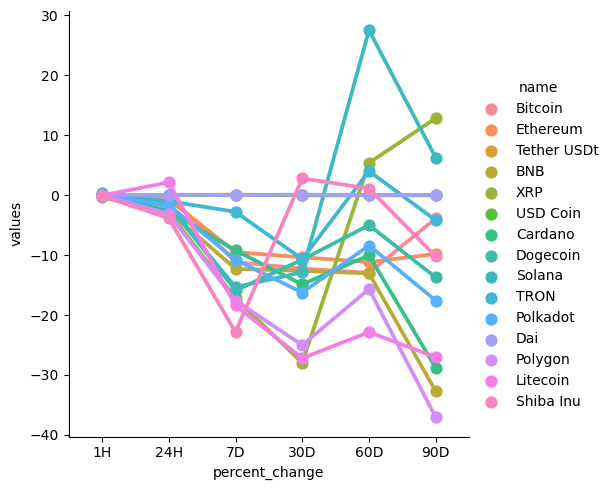

In [17]:
# create line graph to see performance of individual names

sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')